In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

In [2]:
class Perceptron():

    def __init__(self, X_train, X_test, Y_train, Y_test, alpha):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = np.where(Y_train == 0, -1, Y_train)
        self.Y_test = np.where(Y_test == 0, -1, Y_test)
        self.sheta = np.ones(len(X_train[0]) + 1)
        self.alpha = alpha

    @staticmethod
    def plot(W, X, Y):
        plt.figure(figsize=(8, 7))
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=25, edgecolor='k')
        max_value = X.max() + 1
        min_value = X.min() - 1

        line = np.linspace(min_value, max_value)

        for w in W:
            plt.plot(line, -(line * w[1] + w[0]) / w[2])
        plt.ylim(min_value, max_value)
        plt.xlim(min_value, max_value)
        plt.show()

    def predict(self):
        X_train_ = np.hstack((np.ones((len(self.X_train), 1)), self.X_train))
        X_test_ = np.hstack((np.ones((len(self.X_test), 1)), self.X_test))
        train_predict = np.array([1 if self.sheta.dot(x.T) > 0 else -1 for x in X_train_])
        test_predict = np.array([1 if self.sheta.dot(x.T) > 0 else -1 for x in X_test_])
        return train_predict, test_predict

    def score(self):
        Y_train_pred, Y_test_pred= self.predict()
        print(f"train precision score = {precision_score(self.Y_train, Y_train_pred)}")
        print(f"test  precision score = {precision_score(self.Y_test, Y_test_pred)}")

    def fit(self, end_num):
        param = np.array([])
        for x in range(end_num):
            for x, y in zip(np.hstack((np.ones((len(self.X_train), 1)), self.X_train)), self.Y_train):
                if(self.sheta.dot(x.T) * y < 0):
                    self.sheta = self.sheta + self.alpha * x * y
                    param = np.append(param, self.sheta)
        # plot learning process
        self.plot(param.reshape((-1, 3)), self.X_train, self.Y_train)
        return self.sheta


In [3]:
def run(X_data, Y_data, rate, frequency):
    X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, random_state=0)
    percept = Perceptron(X_train, X_test, Y_train, Y_test, rate)
    sheta = percept.fit(frequency)
    percept.plot([sheta], X_data, Y_data)
    percept.score()

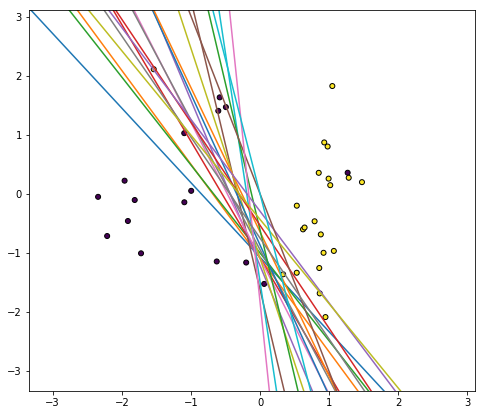

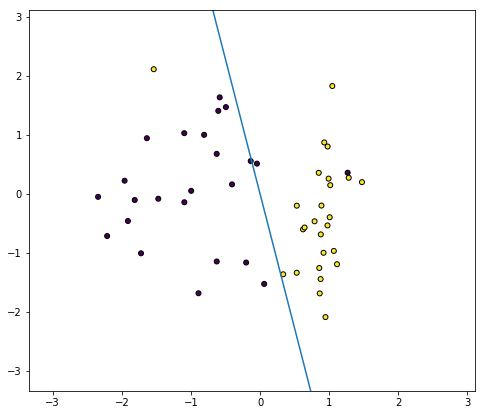

train precision score = 0.9523809523809523
test  precision score = 0.8333333333333334


In [4]:
def main1_1():
    X, Y = make_classification(random_state=12,
                               n_samples=50,
                               n_features=2, 
                               n_redundant=0, 
                               n_informative=1,
                               n_clusters_per_class=1,
                               n_classes=2)
    run(X, Y, 0.1, 5)
main1_1()

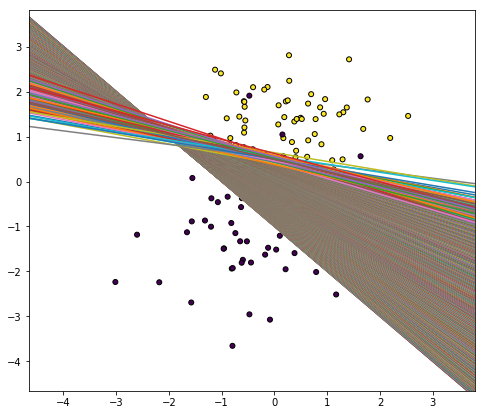

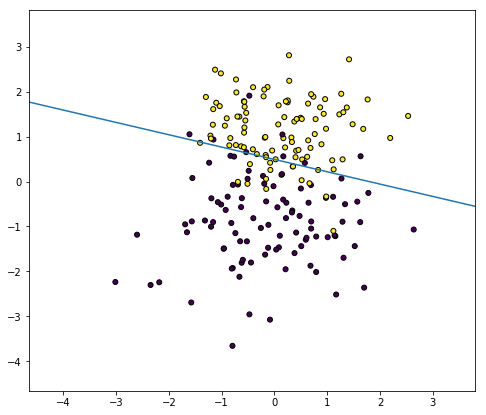

train precision score = 0.8970588235294118
test  precision score = 0.96


In [97]:
def main1_2():
    X, Y = make_classification(random_state=12,
                               n_samples=200,
                               n_features=2, 
                               n_redundant=0, 
                               n_informative=1,
                               n_clusters_per_class=1,
                               n_classes=2)
    run(X, Y, 0.001, 200)
main1_2()

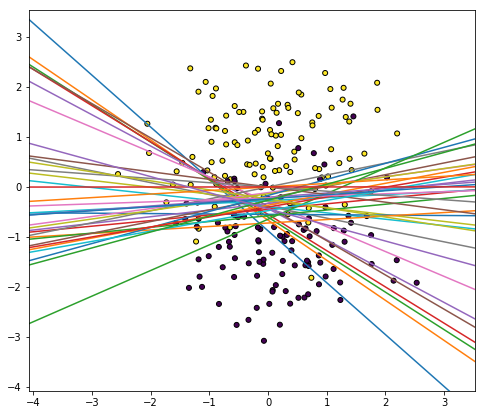

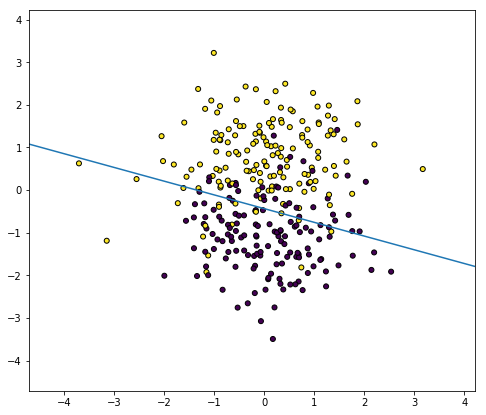

train precision score = 0.8267716535433071
test  precision score = 0.7142857142857143


In [99]:
def main2_1():
    X, Y = make_classification(random_state=12,
                               n_samples=300,
                               n_features=2, 
                               n_redundant=0, 
                               n_informative=1,
                               n_clusters_per_class=1,
                               n_classes=2)
    run(X, Y, 0.1, 1)
main2_1()

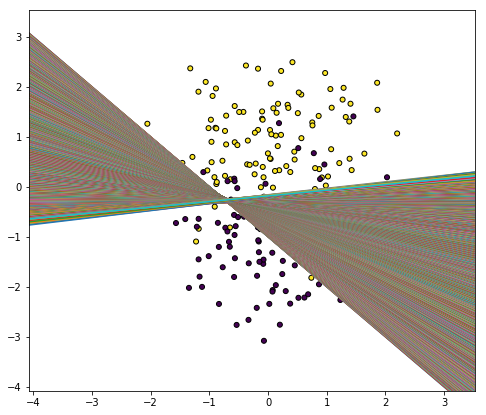

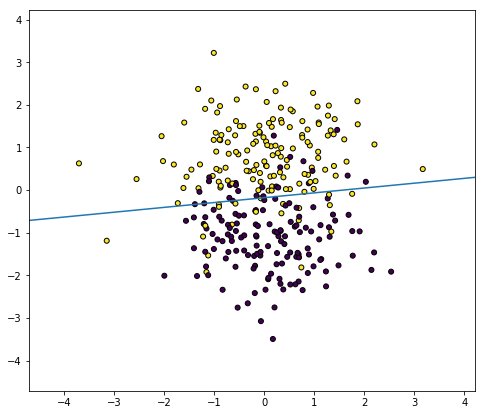

train precision score = 0.8717948717948718
test  precision score = 0.7692307692307693


In [102]:
def main2_2():
    X, Y = make_classification(random_state=12,
                               n_samples=300,
                               n_features=2, 
                               n_redundant=0, 
                               n_informative=1,
                               n_clusters_per_class=1,
                               n_classes=2)
    run(X, Y, 0.001, 100)
main2_2()

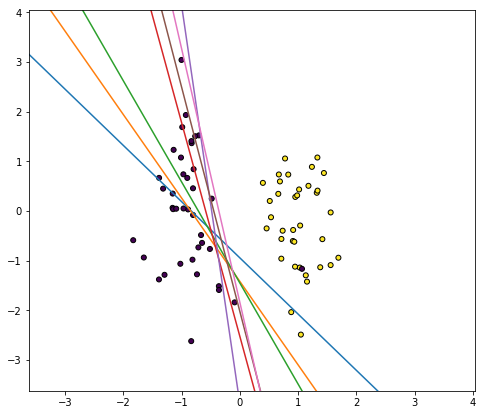

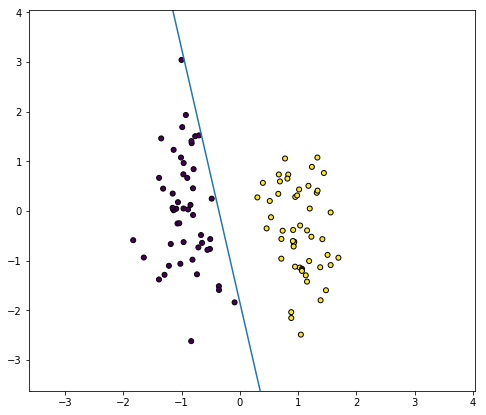

train precision score = 0.972972972972973
test  precision score = 1.0


In [126]:
def main():
    X, Y = make_classification(random_state=12,
                               n_samples=100,
                               n_features=2, 
                               n_redundant=0, 
                               n_informative=1,
                               n_clusters_per_class=1,
                               n_classes=2)
    run(X, Y, 0.1, 1)
main()

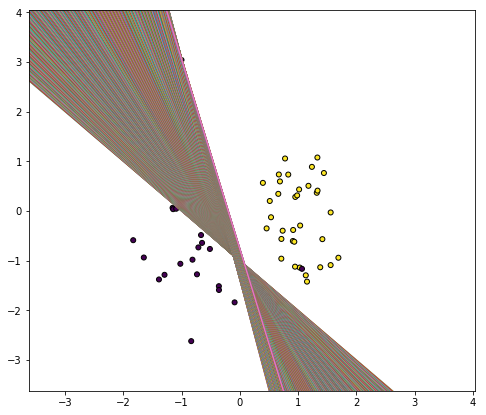

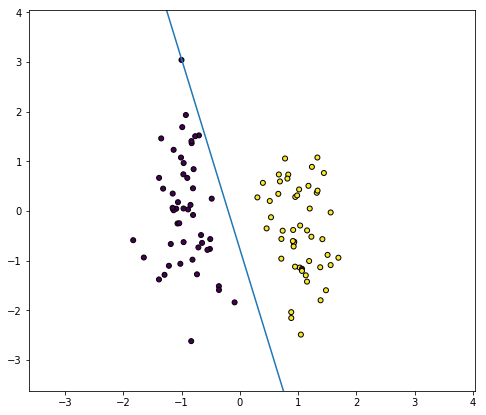

train precision score = 0.972972972972973
test  precision score = 1.0


In [127]:
def main1():
    X, Y = make_classification(random_state=12,
                               n_samples=100,
                               n_features=2, 
                               n_redundant=0, 
                               n_informative=1,
                               n_clusters_per_class=1,
                               n_classes=2)
    run(X, Y, 0.001, 200)
main1()